# End-to-end Machine Learning PySpark Tutorial
https://www.datacamp.com/tutorial/pyspark-tutorial-getting-started-with-pyspark

Customer segmentation is a marketing technique companies use  to identify and group users who display similar characteristics. For instance, if you visit Starbucks only during the summer to purchase cold beverages, you can be segmented as a “seasonal shopper” and enticed with special promotions curated for  the summer season.

Data scientists usually build unsupervised machine learning algorithms such as K-Means clustering or hierarchical clustering to perform customer segmentation. These models are great at identifying similar patterns between user groups that often go unnoticed by the human eye.

In this tutorial, we will use K-Means clustering to perform customer segmentation on the e-commerce dataset.


By the end of this tutorial, you will be familiar with the following concepts:



*   Reading csv files with PySpark
*   Exploratory Data Analysis with PySpark
*   Grouping and sorting data
*   Performing arithmetic operations
*   Aggregating datasets
*   Data Pre-Processing with PySpark
*   Working with datetime values
*   Type conversion
*   Joining two dataframes
*   The rank() function
*   Creating a feature vector
*   Standardizing data
*   Building a K-Means clustering model
*   Interpreting the model

##Paso 1: Configuración del entorno de PySpark en Colab

In [2]:
#Bibliotecas para poder trabajar con Spark
#!sudo apt update
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#!wget -q https://downloads.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
#!tar xf spark-3.5.3-bin-hadoop3.tgz
#Configuración de Spark con Python
#!pip install -q findspark
#!pip install pyspark

#Estableciendo variable de entorno
#import os
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"

##Buscando e inicializando la instalación de Spark
#import findspark
#findspark.init()
#findspark.find()

# Paso 2: Crear la sesión de trabajo de Spark

Ya seleccionado y visto el conjunto de datos comencemos a trabajar con PySpark. Para comenzar a trabajar con PySpark, debemos iniciar la sesión de Spark. Para esto realizaremos lo siguiente:

Importar SparkSession
Crear la sesión

# Iniciar Sesión

In [5]:
# Verificar la funcionalidad de Pyspark
from pyspark.sql import SparkSession
import os
import findspark

# Set environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"

# Initialize findspark
findspark.init()

# Create Spark session
spark = SparkSession.builder.appName('PySpark_LuisTrejo1').getOrCreate()
spark

FileNotFoundError: [Errno 2] No such file or directory: '/content/spark-3.5.3-bin-hadoop3/./bin/spark-submit'

#Step 2: Creating the DataFrame
Note that we defined an escape character to avoid commas in the .csv file when parsing.

In [4]:
df = spark.read.csv('datacamp_ecommerce1D.csv',header=True,escape="\"")


NameError: name 'spark' is not defined

In [ ]:
df.show()

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/2010 08:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/2010 08:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|01/12/2010 08:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|01/1

#Step 3: Exploratory Data Analysis

In [ ]:
#Let’s start by counting the number of rows in the dataframe:
df.count()  # Answer: 2,500


3108

How many unique customers are present in the dataframe?

In [ ]:
df.select('CustomerID').distinct().count() # Answer: 95

99

What country do most purchases come from?
To find the country from which most purchases are made, we need to use the groupBy() clause in PySpark:

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).show()

+--------------+-------------+
|       Country|country_count|
+--------------+-------------+
|       Germany|            2|
|        France|            1|
|          EIRE|            2|
|        Norway|            2|
|     Australia|            1|
|United Kingdom|           95|
|   Netherlands|            1|
+--------------+-------------+



In [ ]:
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+--------------+-------------+
|       Country|country_count|
+--------------+-------------+
|United Kingdom|           95|
|       Germany|            2|
|          EIRE|            2|
|        Norway|            2|
|        France|            1|
|     Australia|            1|
|   Netherlands|            1|
+--------------+-------------+



# When was the most recent purchase made by a customer on the e-commerce platform?
To find when the latest purchase was made on the platform, we need to convert the “InvoiceDate” column into a timestamp format and use the max() function in Pyspark:

In [ ]:
#df = df.withColumn('date',to_timestamp("InvoiceDate", 'MM/dd/yy HH:mm'))
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date',to_timestamp("InvoiceDate", 'dd/MM/yy HH:mm'))
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2010-12-01 17:35:00|
+-------------------+



In [ ]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)



When was the earliest purchase made by a customer on the e-commerce platform?

In [ ]:
df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|2010-12-01 08:26:00|
+-------------------+



# Step 4: Data Pre-processing

Now that we have analyzed the dataset and have a better understanding of each data point, we need to prepare the data to feed into the machine learning algorithm.

From the dataset above, we need to create multiple customer segments based on each user’s purchase behavior.  The variables in this dataset are in a format that cannot be easily ingested into the customer segmentation model.

These features individually do not tell us much about customer purchase behavior. Due to this, we will use the existing variables to derive three new informative features - recency, frequency, and monetary value (RFM).

**RFM** is commonly used in marketing to evaluate a client’s value based on their:
*   Recency: How recently has each customer made a purchase?
*   Frequency: How often have they bought something?
*   Monetary Value: How much money do they spend on average when making purchases?

We will now preprocess the dataframe to create the above variables.

# **Recency**
First, let’s calculate the value of recency - the latest date and time a purchase was made on the platform. This can be achieved in two steps:

**i) Assign a recency score to each customer**

We will subtract every date in the dataframe from the earliest date. This will tell us how recently a customer was seen in the dataframe. A value of 0 indicates the lowest recency, as it will be assigned to the person who was seen making a purchase on the earliest date.

In [ ]:
df = df.withColumn("from_date", lit("01/12/10 08:26"))
df.show()
# lit() assign a literal value to the new column


+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|               date|     from_date|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|01/12/10 08:26|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|01/12/10 08:26|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|01/12/10 08:26|
|   536365|   84029G|KNITTED UNION FLA...|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|01/12/10 08:26|
|   536365|   84029E

In [ ]:
df = df.withColumn('from_date',to_timestamp("from_date", 'dd/MM/yy HH:mm'))
df.show()

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-1

In [ ]:
df2=df.withColumn('from_date',to_timestamp(col('from_date'))).withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))
# It can be simplified. To check
#df2=df.withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))
df2.show()




+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|recency|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84029G|KNITTED UNION FLA...|       6|01/12/2010 08:26|     3.39|    

# ii) Select the most recent purchase

One customer can make multiple purchases at different times. We need to select only the last time they were seen buying a product, as this is indicative of when the most recent purchase was made:

In [ ]:
# This original sentence can be made in two clearer steps

#df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')),on='recency',how='leftsemi')
#df2.show()
latr = df2.groupBy('CustomerID').agg(max('recency').alias('recency'))
latr.show()

+----------+-------+
|CustomerID|recency|
+----------+-------+
|     16250|   5580|
|     15100|   2580|
|     13065|  21960|
|     12838|  12660|
|     15350|  18420|
|     12472|  21960|
|     15235|  21960|
|     15012|  15780|
|     16098|   4740|
|     17897|  15120|
|     16552|  15000|
|     17908|  11940|
|     17377|  14940|
|     13255|  12720|
|     14849|  14220|
|     17025|  21960|
|     14237|  17640|
|     12433|  17880|
|     17572|  15900|
|     14496|  21960|
+----------+-------+
only showing top 20 rows



In [ ]:
df2 = df2.join(latr,on='recency',how='leftsemi')
df2.show()

# performs a left semi join between two PySpark DataFrames, df2 and latr, based on
# the 'recency' column. It retains only the rows from df2
# that have matching values in the 'recency' column of latr, and the resulting
# DataFrame is stored in the variable df2.

+-------+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+
|recency|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|
+-------+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+
|    540|   536369|    21756|BATH BUILDING BLO...|       3|01/12/2010 08:35|     5.95|     13047|United Kingdom|2010-12-01 08:35:00|2010-12-01 08:26:00|
|   1140|   536370|    22728|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|     3.75|     12583|        France|2010-12-01 08:45:00|2010-12-01 08:26:00|
|   1140|   536370|    22727|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|     3.75|     12583|        France|2010-12-01 08:45:00|2010-12-01 08:26:00|
|   1140|   536370|    22726|ALARM CLOCK BAKEL...|      12|01/12/2010 08:45|     3

# Frequency

Let’s now calculate the value of frequency - how often a customer bought something on the platform. To do this, we just need to group by each customer ID and count the number of items they purchased:

In [ ]:
df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))
df_freq.show()

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|     16250|       14|
|     15100|        1|
|     13065|       14|
|     12838|       58|
|     15350|        5|
|     12472|       13|
|     15235|        5|
|     15012|       53|
|     16098|       12|
|     17897|        2|
|     16552|        5|
|     17908|       58|
|     17377|       14|
|     13255|        6|
|     14849|        3|
|     17025|        5|
|     14237|        9|
|     12433|       73|
|     17572|        4|
|     14496|        5|
+----------+---------+
only showing top 20 rows



This new dataframe only has two columns, and we need to join it with the previous one:

In [ ]:
df3 = df2.join(df_freq,on='CustomerID',how='inner')
df3.show()

+----------+-------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+-------------------+---------+
|CustomerID|recency|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|       Country|               date|          from_date|frequency|
+----------+-------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+-------------------+---------+
|     13047|    540|   536369|    21756|BATH BUILDING BLO...|       3|01/12/2010 08:35|     5.95|United Kingdom|2010-12-01 08:35:00|2010-12-01 08:26:00|        1|
|     12583|   1140|   536370|    22728|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|     3.75|        France|2010-12-01 08:45:00|2010-12-01 08:26:00|       20|
|     12583|   1140|   536370|    22727|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|     3.75|        France|2010-12-01 08:45:00|2010-12-01 08:26:00|       20|
|     12583|   1140|  

# Monetary Value
Finally, let’s calculate monetary value - the total amount spent by each customer in the dataframe. There are two steps to achieving this:

**i) Find the total amount spent in each purchase:**

Each customerID comes with variables called “Quantity” and “UnitPrice” for a single purchase:

To get the total amount spent by each customer in one purchase, we need to multiply “Quantity” with “UnitPrice”:

In [ ]:
m_val = df3.withColumn('TotalAmount',col("Quantity") * col("UnitPrice"))
m_val.show()

+----------+-------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+-------------------+---------+------------------+
|CustomerID|recency|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|       Country|               date|          from_date|frequency|       TotalAmount|
+----------+-------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+-------------------+---------+------------------+
|     13047|    540|   536369|    21756|BATH BUILDING BLO...|       3|01/12/2010 08:35|     5.95|United Kingdom|2010-12-01 08:35:00|2010-12-01 08:26:00|        1|             17.85|
|     12583|   1140|   536370|    22728|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|     3.75|        France|2010-12-01 08:45:00|2010-12-01 08:26:00|       20|              90.0|
|     12583|   1140|   536370|    22727|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|   

**ii) Find the total amount spent by each customer:**

To find the total amount spent by each customer overall, we just need to group by the CustomerID column and sum the total amount spent:

In [ ]:
m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))
m_val.show()

+----------+------------------+
|CustomerID|    monetary_value|
+----------+------------------+
|     16250|            226.14|
|     15100|             350.4|
|     13065|108.03000000000002|
|     12838| 355.3899999999999|
|     15350|111.75000000000001|
|     12472| 67.27999999999999|
|     15235|41.099999999999994|
|     15012| 189.1099999999999|
|     16098|430.59999999999997|
|     17897|              98.7|
|     16552|105.49000000000001|
|     17908| 243.2799999999999|
|     17377|188.20000000000005|
|     13255|243.40000000000003|
|     14849|             57.45|
|     17025|              74.0|
|     14237|            170.95|
|     12433|1939.8400000000006|
|     17572| 83.10000000000001|
|     14496|15.069999999999999|
+----------+------------------+
only showing top 20 rows



Merge this dataframe with the all the other variables:

In [ ]:
finaldf = m_val.join(df3,on='CustomerID',how='inner')
finaldf.show()

+----------+--------------+-------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+-------------------+---------+
|CustomerID|monetary_value|recency|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|       Country|               date|          from_date|frequency|
+----------+--------------+-------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+-------------------+---------+
|     13047|         17.85|    540|   536369|    21756|BATH BUILDING BLO...|       3|01/12/2010 08:35|     5.95|United Kingdom|2010-12-01 08:35:00|2010-12-01 08:26:00|        1|
|     12583|        855.86|   1140|   536370|    22728|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|     3.75|        France|2010-12-01 08:45:00|2010-12-01 08:26:00|       20|
|     12583|        855.86|   1140|   536370|    22727|ALARM CLOCK BAKEL...|      24|01/12/2010 08:45|     3.7

Now that we have created all the necessary variables to build the model, run the following lines of code to select only the required columns and drop duplicate rows from the dataframe:

In [ ]:
finaldf = finaldf.select(['recency','frequency','monetary_value','CustomerID']).distinct()
finaldf.show()

+-------+---------+------------------+----------+
|recency|frequency|    monetary_value|CustomerID|
+-------+---------+------------------+----------+
|   5580|       14|            226.14|     16250|
|   2580|        1|             350.4|     15100|
|  21960|       14|108.03000000000002|     13065|
|  12660|       58| 355.3899999999999|     12838|
|  18420|        5|111.75000000000001|     15350|
|  18300|        5|111.75000000000001|     15350|
|  21960|       13| 67.27999999999999|     12472|
|  21960|        5|41.099999999999994|     15235|
|  15780|       53| 189.1099999999999|     15012|
|   4740|       12|430.59999999999997|     16098|
|  15120|        2|              98.7|     17897|
|  14460|        2|              98.7|     17897|
|  15000|        5|105.49000000000001|     16552|
|  14940|        5|105.49000000000001|     16552|
|  11940|       58| 243.2799999999999|     17908|
|  14940|       14|188.20000000000005|     17377|
|  12720|        6|243.40000000000003|     13255|


# Standardization

Before building the customer segmentation model, let’s standardize the dataframe to ensure that all the variables are around the same scale:

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble=VectorAssembler(inputCols=[
    'recency','frequency','monetary_value'
], outputCol='features')

assembled_data=assemble.transform(finaldf)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

Run the following lines of code to see what the standardized feature vector looks like:

In [ ]:
data_scale_output.select('standardized').show()
data_scale_output.show()

+--------------------+
|        standardized|
+--------------------+
|[0.94972052710856...|
|[0.43911809317922...|
|[3.73760981636274...|
|[2.1547422711818,...|
|[3.11467484696895...|
|[3.13509894432612...|
|[3.73760981636274...|
|[3.73760981636274...|
|[2.68576880246830...|
|[0.80675184560835...|
|[2.46110373153940...|
|[2.57343626700385...|
|[2.54280012096809...|
|[2.55301216964668...|
|[2.03219768703875...|
|[2.54280012096809...|
|[2.1547422711818,...|
|[2.16495431986038...|
|[2.33855914739636...|
|[2.42025553682505...|
+--------------------+
only showing top 20 rows

+-------+---------+------------------+----------+--------------------+--------------------+
|recency|frequency|    monetary_value|CustomerID|            features|        standardized|
+-------+---------+------------------+----------+--------------------+--------------------+
|   5580|       14|            226.14|     16250|[5580.0,14.0,226.14]|[0.94972052710856...|
|   2580|        1|             350.4|     15100|  [25

In [ ]:
data_scale_output.select('standardized').show(10,truncate=False)

+------------------------------------------------------------+
|standardized                                                |
+------------------------------------------------------------+
|[0.9497205271085658,0.7033107207198176,0.46036259897625037] |
|[0.43911809317922934,0.050236480051415545,0.713323846649324]|
|[3.7376098163627427,0.7033107207198176,0.21992116196782674] |
|[2.1547422711818,2.9137158429821017,0.7234821970910479]     |
|[3.1146748469689522,0.2511824002570777,0.22749412061376134] |
|[3.135098944326126,0.2511824002570777,0.22749412061376134]  |
|[3.7376098163627427,0.6530742406684021,0.13696469292969896] |
|[3.7376098163627427,0.2511824002570777,0.08366897858814844] |
|[2.6857688024683095,2.662533442725024,0.3849790885840571]   |
|[0.8067518456083516,0.6028377606169866,0.8765903206826453]  |
+------------------------------------------------------------+
only showing top 10 rows



These are the scaled features that will be fed into the clustering algorithm.

# Step 5: Building the Machine Learning Model

Now that we have completed all the data analysis and preparation, let’s build the K-Means clustering model.  The algorithm will be created using PySpark’s machine learning API.

**i) Finding the number of clusters to use**

When building a K-Means clustering model, we first need to determine the number of clusters or groups we want the algorithm to return. If we decide on three clusters, for instance, then we will have three customer segments.

The most popular technique used to decide on how many clusters to use in K-Means is called the “elbow-method.” This is done simply running the K-Means algorithm for a wide range of clusters and visualizing the model results for each cluster. The plot will have an inflection point that looks like an elbow, and we just pick the number of clusters at this point.

Let’s run the following lines of code to build a K-Means clustering algorithm from 2 to 10 clusters:

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost
print(cost)

[  0.           0.         272.33395221 187.86862455 120.41250627
 104.66780664  93.86443788  79.34205484  67.22715047  51.6387408 ]


With the codes above, we have successfully built and evaluated a K-Means clustering model with 2 to 10 clusters. The results have been placed in an array, and can now be visualized in a line chart:

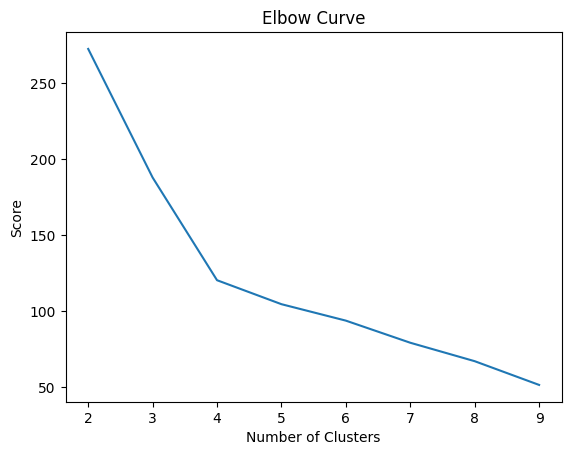

In [ ]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**ii) Building the K-Means Clustering Model**

From the plot above, we can see that there is an inflection point that looks like an elbow at four. Due to this, we will proceed to build the K-Means algorithm with four clusters:

In [ ]:
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)

# iii) Making Predictions

Let’s use the model we created to assign clusters to each customer in the dataset:

In [ ]:
preds=KMeans_fit.transform(data_scale_output)

preds.show(5,0)

+-------+---------+------------------+----------+---------------------------------+------------------------------------------------------------+----------+
|recency|frequency|monetary_value    |CustomerID|features                         |standardized                                                |prediction|
+-------+---------+------------------+----------+---------------------------------+------------------------------------------------------------+----------+
|5580   |14       |226.14            |16250     |[5580.0,14.0,226.14]             |[0.9497205271085658,0.7033107207198176,0.46036259897625037] |2         |
|2580   |1        |350.4             |15100     |[2580.0,1.0,350.4]               |[0.43911809317922934,0.050236480051415545,0.713323846649324]|2         |
|21960  |14       |108.03000000000002|13065     |[21960.0,14.0,108.03000000000002]|[3.7376098163627427,0.7033107207198176,0.21992116196782674] |0         |
|12660  |58       |355.3899999999999 |12838     |[12660.0,58.0,3

Notice that there is a “prediction” column in this dataframe that tells us which cluster each CustomerID belongs to:

# Step 6: Cluster Analysis

The final step in this entire tutorial is to analyze the customer segments we just built. Run the following lines of code to visualize the recency, frequency, and monetary value of each customerID in the dataframe:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('recency','frequency','monetary_value','prediction')
df_viz = df_viz.toPandas()
print(df_viz)



     recency  frequency  monetary_value  prediction
0       5580         14          226.14           2
1       2580          1          350.40           2
2      21960         14          108.03           0
3      12660         58          355.39           1
4      18300          5          111.75           0
..       ...        ...             ...         ...
128     7860          1           79.60           2
129    10500         64          354.23           1
130    21960          6           31.99           0
131    14220         14         2472.64           3
132    14460         14         2472.64           3

[133 rows x 4 columns]


In [ ]:
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()
print (avg_df)

   prediction       recency  frequency  monetary_value
0           0  18282.222222  11.962963      234.917407
1           1  15496.666667  57.833333      469.605556
2           2   6152.142857  11.785714      338.737500
3           3  12780.000000  33.833333     2307.436667


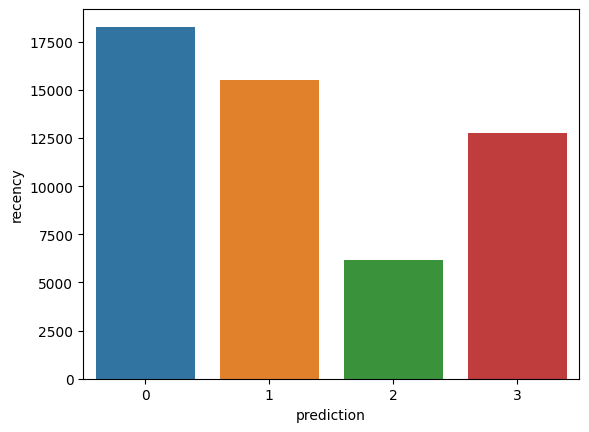

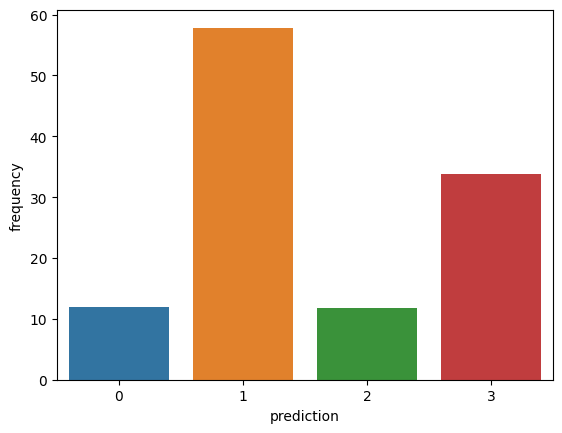

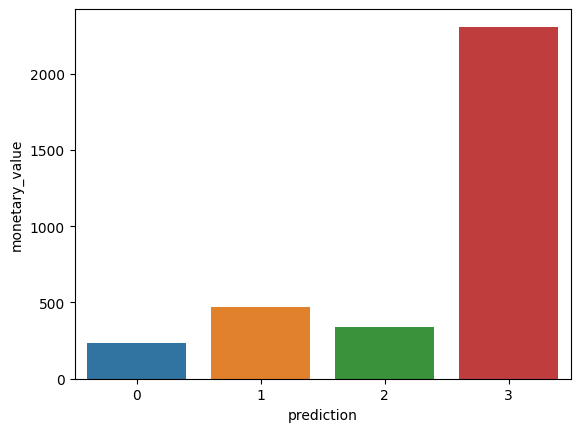

In [ ]:
list1 = ['recency','frequency','monetary_value']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()

Here is an overview of characteristics displayed by customers in each cluster:

*   **Cluster 0**: Customers in this segment display low recency, frequency, and monetary value. They rarely shop on the platform and are low potential customers who are likely to stop doing business with the ecommerce company.
*   **Cluster 1**: Users in this cluster display high recency but haven’t been seen spending much on the platform. They also don’t visit the site often. This indicates that they might be newer customers who have just started doing business with the company.
*   **Cluster 2**: Customers in this segment display medium recency and frequency and spend a lot of money on the platform. This indicates that they tend to buy high-value items or make bulk purchases.
*  **Cluster 3**: The final segment comprises users who display high recency and make frequent purchases on the platform. However, they don’t spend much on the platform, which might mean that they tend to select cheaper items in each purchase.





